In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

import time



In [2]:
# Sample data
data = Dataset.load_builtin('ml-100k')  # built-in MovieLens 100k dataset
trainset, testset = train_test_split(data, test_size=0.25)

start_time = time.time()
# Use SVD (an LFM)
model = SVD()
model.fit(trainset)

end_time = time.time()

ref_time = end_time - start_time
print(f"Time taken: {ref_time} seconds")

predictions = model.test(testset)

# Evaluate
ref_rmse = accuracy.rmse(predictions)
ref_mae = accuracy.mae(predictions)
print(f"RMSE: {ref_rmse}")
print(f"MAE: {ref_mae}")









Time taken: 1.0166313648223877 seconds
RMSE: 0.9405
MAE:  0.7411
RMSE: 0.9404596312526945
MAE: 0.7410838766319081


In [3]:
from lfm import SVD as custom_svd

start_time = time.time()
model = custom_svd()
model.fit(trainset)
end_time = time.time()
custom_time = end_time - start_time
print(f"Time taken: {custom_time} seconds")

predictions = model.test(testset)

custom_rmse = accuracy.rmse(predictions)
custom_mae = accuracy.mae(predictions)
print(f"RMSE: {custom_rmse}")
print(f"MAE: {custom_mae}")









Time taken: 19.63509249687195 seconds
RMSE: 0.9434
MAE:  0.7429
RMSE: 0.9433662537274469
MAE: 0.7428769267400416


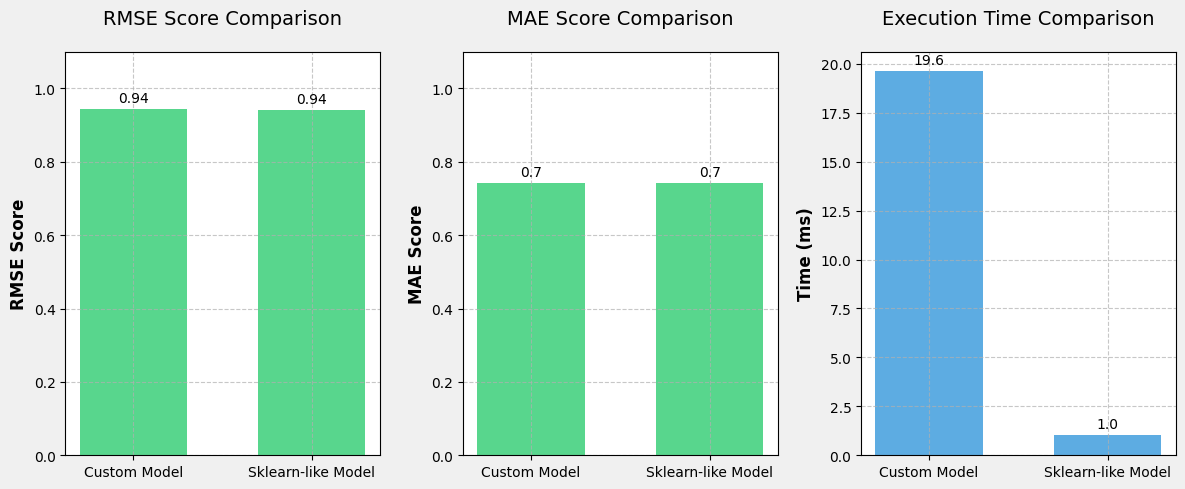

In [12]:
# Setup for plotting with modern style
plt.style.use('default')

# Data preparation
model_names = ['Custom Model', 'Sklearn-like Model']
rmse_scores_plot = [custom_rmse, ref_rmse]
mae_scores_plot = [custom_mae, ref_mae]
time_taken_plot = [custom_time, ref_time]

# Create figure with two subplots
fig, (ax1, ax3, ax2) = plt.subplots(1, 3, figsize=(12, 5))
fig.patch.set_facecolor('#f0f0f0')

# Set positions for bars
x = np.arange(len(model_names))
width = 0.6

# Create R2 Score bars with modern styling
bars1 = ax1.bar(x, rmse_scores_plot, width, color='#2ecc71', alpha=0.8)
ax1.set_ylabel('RMSE Score', fontsize=12, fontweight='bold')
ax1.set_title('RMSE Score Comparison', fontsize=14, pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, fontsize=10)
ax1.set_ylim(0, 1.1)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create R2 Score bars with modern styling
bars3 = ax3.bar(x, mae_scores_plot, width, color='#2ecc71', alpha=0.8)
ax3.set_ylabel('MAE Score', fontsize=12, fontweight='bold')
ax3.set_title('MAE Score Comparison', fontsize=14, pad=20)
ax3.set_xticks(x)
ax3.set_xticklabels(model_names, fontsize=10)
ax3.set_ylim(0, 1.1)
ax3.grid(True, linestyle='--', alpha=0.7)

# Create Time bars with modern styling
bars2 = ax2.bar(x, time_taken_plot, width, color='#3498db', alpha=0.8)
ax2.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
ax2.set_title('Execution Time Comparison', fontsize=14, pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add value labels with modern styling
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

for bar in bars3:
    height = bar.get_height()
    ax3.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)
# Adjust layout and display
plt.tight_layout()
plt.show()